# Исследование объявлений о продаже квартир

В вашем распоряжении данные сервиса Яндекс.Недвижимость — архив объявлений о продаже квартир в Санкт-Петербурге и соседних населённых пунктов за несколько лет. Нужно научиться определять рыночную стоимость объектов недвижимости. Ваша задача — установить параметры. Это позволит построить автоматизированную систему: она отследит аномалии и мошенническую деятельность.

По каждой квартире на продажу доступны два вида данных. Первые вписаны пользователем, вторые — получены автоматически на основе картографических данных. Например, расстояние до центра, аэропорта, ближайшего парка и водоёма.

*Откроем файл с данными и изучим общую информацию*.

In [ ]:
#import pandas as pd
#import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import matplotlib
data=pd.read_csv ('/datasets/real_estate_data.csv', sep='\t')

### Предобработка данных

In [ ]:
print (data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23699 entries, 0 to 23698
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   total_images          23699 non-null  int64  
 1   last_price            23699 non-null  float64
 2   total_area            23699 non-null  float64
 3   first_day_exposition  23699 non-null  object 
 4   rooms                 23699 non-null  int64  
 5   ceiling_height        14504 non-null  float64
 6   floors_total          23613 non-null  float64
 7   living_area           21796 non-null  float64
 8   floor                 23699 non-null  int64  
 9   is_apartment          2775 non-null   object 
 10  studio                23699 non-null  bool   
 11  open_plan             23699 non-null  bool   
 12  kitchen_area          21421 non-null  float64
 13  balcony               12180 non-null  float64
 14  locality_name         23650 non-null  object 
 15  airports_nearest   

In [ ]:
print (data.head(5))

   total_images  last_price  total_area first_day_exposition  rooms  \
0            20  13000000.0       108.0  2019-03-07T00:00:00      3   
1             7   3350000.0        40.4  2018-12-04T00:00:00      1   
2            10   5196000.0        56.0  2015-08-20T00:00:00      2   
3             0  64900000.0       159.0  2015-07-24T00:00:00      3   
4             2  10000000.0       100.0  2018-06-19T00:00:00      2   

   ceiling_height  floors_total  living_area  floor is_apartment  ...  \
0            2.70          16.0         51.0      8          NaN  ...   
1             NaN          11.0         18.6      1          NaN  ...   
2             NaN           5.0         34.3      4          NaN  ...   
3             NaN          14.0          NaN      9          NaN  ...   
4            3.03          14.0         32.0     13          NaN  ...   

   kitchen_area  balcony    locality_name  airports_nearest  \
0          25.0      NaN  Санкт-Петербург           18863.0   
1       

Построим гистограмму для всех числовых столбцов таблицы на одном графике

array([[<AxesSubplot:title={'center':'total_images'}>,
        <AxesSubplot:title={'center':'last_price'}>,
        <AxesSubplot:title={'center':'total_area'}>,
        <AxesSubplot:title={'center':'rooms'}>],
       [<AxesSubplot:title={'center':'ceiling_height'}>,
        <AxesSubplot:title={'center':'floors_total'}>,
        <AxesSubplot:title={'center':'living_area'}>,
        <AxesSubplot:title={'center':'floor'}>],
       [<AxesSubplot:title={'center':'kitchen_area'}>,
        <AxesSubplot:title={'center':'balcony'}>,
        <AxesSubplot:title={'center':'airports_nearest'}>,
        <AxesSubplot:title={'center':'cityCenters_nearest'}>],
       [<AxesSubplot:title={'center':'parks_around3000'}>,
        <AxesSubplot:title={'center':'parks_nearest'}>,
        <AxesSubplot:title={'center':'ponds_around3000'}>,
        <AxesSubplot:title={'center':'ponds_nearest'}>],
       [<AxesSubplot:title={'center':'days_exposition'}>, <AxesSubplot:>,
        <AxesSubplot:>, <AxesSubplot:>]], d

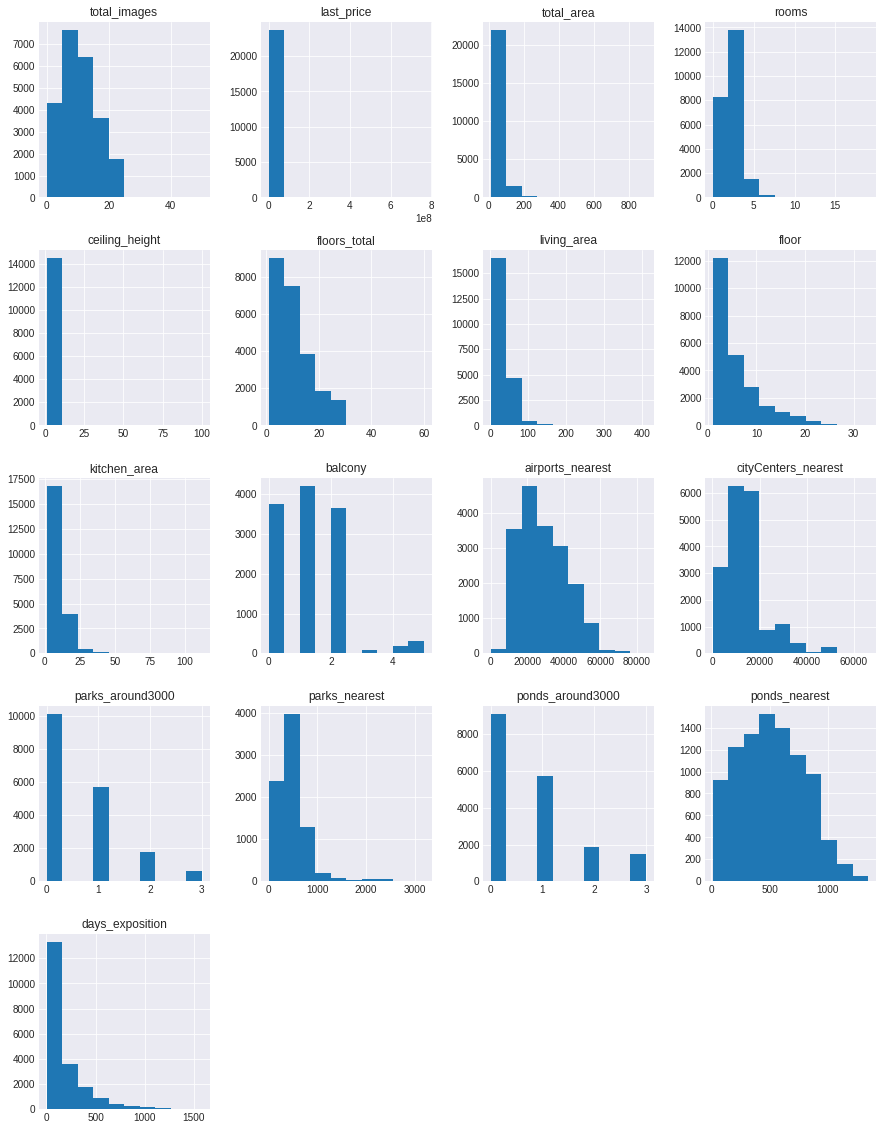

In [ ]:
matplotlib.style.use('seaborn-dark')
data.hist(figsize=(15, 20))

In [ ]:
print (data.isna().sum())
print('Число дубликатов:', data.duplicated().sum())

total_images                0
last_price                  0
total_area                  0
first_day_exposition        0
rooms                       0
ceiling_height           9195
floors_total               86
living_area              1903
floor                       0
is_apartment            20924
studio                      0
open_plan                   0
kitchen_area             2278
balcony                 11519
locality_name              49
airports_nearest         5542
cityCenters_nearest      5519
parks_around3000         5518
parks_nearest           15620
ponds_around3000         5518
ponds_nearest           14589
days_exposition          3181
dtype: int64
Число дубликатов: 0


In [ ]:
data.describe()

,total_images,last_price,total_area,rooms,ceiling_height,floors_total,living_area,floor,kitchen_area,balcony,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
count,23699.000000,2.369900e+04,23699.000000,23699.000000,14504.000000,23613.000000,21796.000000,23699.000000,21421.000000,12180.000000,18157.000000,18180.000000,18181.000000,8079.000000,18181.000000,9110.000000,20518.000000
mean,9.858475,6.541549e+06,60.348651,2.070636,2.771499,10.673824,34.457852,5.892358,10.569807,1.150082,28793.672193,14191.277833,0.611408,490.804555,0.770255,517.980900,180.888634
std,5.682529,1.088701e+07,35.654083,1.078405,1.261056,6.597173,22.030445,4.885249,5.905438,1.071300,12630.880622,8608.386210,0.802074,342.317995,0.938346,277.720643,219.727988
min,0.000000,1.219000e+04,12.000000,0.000000,1.000000,1.000000,2.000000,1.000000,1.300000,0.000000,0.000000,181.000000,0.000000,1.000000,0.000000,13.000000,1.000000
25%,6.000000,3.400000e+06,40.000000,1.000000,2.520000,5.000000,18.600000,2.000000,7.000000,0.000000,18585.000000,9238.000000,0.000000,288.000000,0.000000,294.000000,45.000000
50%,9.000000,4.650000e+06,52.000000,2.000000,2.650000,9.000000,30.000000,4.000000,9.100000,1.000000,26726.000000,13098.500000,0.000000,455.000000,1.000000,502.000000,95.000000
75%,14.000000,6.800000e+06,69.900000,3.000000,2.800000,16.000000,42.300000,8.000000,12.000000,2.000000,37273.000000,16293.000000,1.000000,612.000000,1.000000,729.000000,232.000000
max,50.000000,7.630000e+08,900.000000,19.000000,100.000000,60.000000,409.700000,33.000000,112.000000,5.000000,84869.000000,65968.000000,3.000000,3190.000000,3.000000,1344.000000,1580.000000


#### Первые выводы об имеющихся данных:

Всего у нас имеется 23699 записей, есть пропущенные значения, в том числе в важных для анализа столбцах (жилая площадь и название населенного пункта), а также аномальные значения и неправильные типы данных. Явных дубликатов в данных не обнаружено.

In [ ]:
#Заменим пропуски в столбце Апартаменты на значение False
data['is_apartment']=data['is_apartment'].fillna(False)
#Предположительно пропуски в столбце Балконы связаны с их отсутствием, заменим на 0
data['balcony']=data['balcony'].fillna(0)

In [ ]:
# Убираем строки датафрейма, где отсутствует название локации и этажность
data.dropna(subset=['locality_name'], inplace=True)
data.dropna(subset=['floors_total'], inplace=True)

In [ ]:
# для квартир типа "студия" ставим в столбце "кухня" О
data.loc[data['studio'] == True, 'kitchen_area'] = 0
# вычислим коэффициент отношения жилой площади к общей площади и выведем среднее значение
living_ratio = data['living_area'].mean() / data['total_area'].mean()
# вычислим коэффициент отношения площади кухни к общей площади и выведем среднее значение
kitchen_ratio = data['kitchen_area'].mean() / data['total_area'].mean()
# пропущенные значения в столбце "Жилая площадь" заполним произведением общей площади на коэф-т
data['living_area'].fillna(living_ratio * data['total_area'], inplace=True)
# пропущенные значения в столбце "площадь кухни" заполним произведением общей площади на коэф-т
data['kitchen_area'].fillna(kitchen_ratio * data['total_area'], inplace=True)

В столбце "дней экспозиции" более 3181 пропусков. Возможно квартира была снята с продажи, т.к.продавец передумал или иные обстоятельства. автоматом или это техническая ошибка, которая произошла в момент сбора/выгрузки данных. Данные этого столбца важны для исследования. Заполнить значения нечем, оставим пропуски.


    Ниже мы проведем заполнение высоты потолков (скорректируем явно ошибочные данные, а пропуски заполним медианным значением).
    Еще ниже заполним данные о расстоянии до аэропорта (в Питере только Пулково) данными, которые повторят данные для той же локации. Заполнять эти данные цифрами, опираясь на расстояние от центра нельзя, т.к. в этот радиус может попадать несколько районов, скорее лучше решать это с разработчиками.
    Данные касательно парков и прудов тоже лучше запросить у разработчиков.

In [ ]:
# После удаления/замены пропусков изменим очевидно натуральные значения данных
# в столбцах Всего этажей и балконы с вещественных на целочисленные
data['floors_total'] = data['floors_total'].astype(int)
data['balcony'] = data['balcony'].astype(int)
# оценим, что происходит с потолками, выведя уникальные значения
print (sorted(data['ceiling_height'].unique()))

[1.0, 2.0, 2.3, 2.4, 2.45, 2.46, 2.48, 2.53, 2.59, 2.62, 2.63, 2.7, nan, 1.2, 1.75, 2.2, 2.25, 2.34, 2.47, 2.49, 2.5, 2.51, 2.52, 2.54, 2.55, 2.56, 2.57, 2.58, 2.6, 2.61, 2.64, 2.65, 2.66, 2.67, 2.68, 2.69, 2.71, 2.72, 2.73, 2.74, 2.75, 2.76, 2.77, 2.78, 2.79, 2.8, 2.81, 2.82, 2.83, 2.84, 2.85, 2.86, 2.87, 2.88, 2.89, 2.9, 2.91, 2.92, 2.93, 2.94, 2.95, 2.96, 2.97, 2.98, 2.99, 3.0, 3.01, 3.02, 3.03, 3.04, 3.05, 3.06, 3.07, 3.08, 3.09, 3.1, 3.11, 3.12, 3.13, 3.14, 3.15, 3.16, 3.17, 3.18, 3.2, 3.21, 3.22, 3.23, 3.24, 3.25, 3.26, 3.27, 3.28, 3.29, 3.3, 3.31, 3.32, 3.33, 3.34, 3.35, 3.36, 3.37, 3.38, 3.39, 3.4, 3.42, 3.43, 3.44, 3.45, 3.46, 3.47, 3.48, 3.49, 3.5, 3.51, 3.52, 3.53, 3.54, 3.55, 3.56, 3.57, 3.58, 3.59, 3.6, 3.62, 3.63, 3.65, 3.66, 3.67, 3.68, 3.69, 3.7, 3.75, 3.76, 3.78, 3.8, 3.82, 3.83, 3.84, 3.85, 3.86, 3.87, 3.88, 3.9, 3.93, 3.95, 3.98, 4.0, 4.06, 4.1, 4.14, 4.15, 4.19, 4.2, 4.25, 4.3, 4.37, 4.4, 4.45, 4.5, 4.65, 4.7, 4.8, 4.9, 5.0, 5.2, 5.3, 5.5, 5.6, 5.8, 6.0, 8.0, 8.3, 1

(2.0, 3.5)

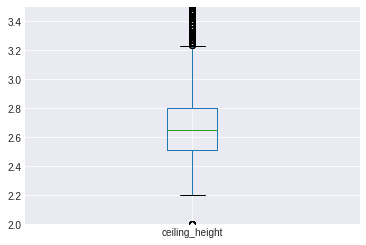

In [ ]:
ceiling = data[['ceiling_height']]
ceiling.boxplot()
plt.ylim(2, 3.5)

In [ ]:
# аномальные значения в высоте потолков (больше 21) скорее всего
# являются опечатками, приведем к нормальынм значениям, поделив на 10
data['ceiling_height']=data['ceiling_height'].apply(lambda h:h/10 if h>21 else h)
# выведем медиану для значений больше 2,2 и меньше 8 м
median=data.loc[(data['ceiling_height'] <=8) & (data['ceiling_height'] >= 2.4), 'ceiling_height'].median()
data.loc[(data['ceiling_height'] < 2.2) |(data['ceiling_height'] > 8) | (data['ceiling_height'].isna()), 'ceiling_height'] = median
data = data[(data['ceiling_height'] > 2.2) & (data['ceiling_height'] <= 5)]
print (sorted(data['ceiling_height'].unique()))

[2.25, 2.2600000000000002, 2.3, 2.34, 2.4, 2.45, 2.46, 2.47, 2.48, 2.49, 2.5, 2.51, 2.52, 2.53, 2.54, 2.55, 2.56, 2.57, 2.58, 2.59, 2.6, 2.61, 2.62, 2.63, 2.64, 2.65, 2.66, 2.67, 2.68, 2.69, 2.7, 2.71, 2.72, 2.73, 2.74, 2.75, 2.76, 2.77, 2.78, 2.79, 2.8, 2.81, 2.82, 2.83, 2.84, 2.85, 2.86, 2.87, 2.88, 2.89, 2.9, 2.91, 2.92, 2.93, 2.94, 2.95, 2.96, 2.97, 2.98, 2.99, 3.0, 3.01, 3.02, 3.03, 3.04, 3.05, 3.06, 3.07, 3.08, 3.09, 3.1, 3.11, 3.12, 3.13, 3.14, 3.15, 3.16, 3.17, 3.18, 3.2, 3.21, 3.22, 3.23, 3.24, 3.25, 3.26, 3.27, 3.28, 3.29, 3.3, 3.31, 3.32, 3.33, 3.34, 3.35, 3.36, 3.37, 3.38, 3.39, 3.4, 3.42, 3.43, 3.44, 3.45, 3.46, 3.47, 3.48, 3.49, 3.5, 3.51, 3.52, 3.53, 3.54, 3.55, 3.56, 3.57, 3.58, 3.59, 3.6, 3.62, 3.63, 3.65, 3.66, 3.67, 3.68, 3.69, 3.7, 3.75, 3.76, 3.78, 3.8, 3.82, 3.83, 3.84, 3.85, 3.86, 3.87, 3.88, 3.9, 3.93, 3.95, 3.98, 4.0, 4.06, 4.1, 4.14, 4.15, 4.19, 4.2, 4.25, 4.3, 4.37, 4.4, 4.45, 4.5, 4.65, 4.7, 4.8, 4.9, 5.0]


In [ ]:
# Проверим неявные дубликаты в названиях локаций, для чего выведем уникальные называния локаций и
# ознакомимся с результатом
print (data['locality_name'].unique())

['Санкт-Петербург' 'посёлок Шушары' 'городской посёлок Янино-1'
 'посёлок Парголово' 'посёлок Мурино' 'Ломоносов' 'Сертолово' 'Петергоф'
 'Пушкин' 'деревня Кудрово' 'Коммунар' 'Колпино'
 'поселок городского типа Красный Бор' 'Гатчина' 'поселок Мурино'
 'деревня Фёдоровское' 'Выборг' 'Кронштадт' 'Кировск'
 'деревня Новое Девяткино' 'посёлок Металлострой'
 'посёлок городского типа Лебяжье' 'посёлок городского типа Сиверский'
 'поселок Молодцово' 'поселок городского типа Кузьмоловский'
 'садовое товарищество Новая Ропша' 'Павловск' 'деревня Пикколово'
 'Всеволожск' 'Волхов' 'Кингисепп' 'Приозерск' 'Сестрорецк'
 'деревня Куттузи' 'посёлок Аннино' 'поселок городского типа Ефимовский'
 'посёлок Плодовое' 'деревня Заклинье' 'поселок Торковичи'
 'поселок Первомайское' 'Красное Село' 'посёлок Понтонный' 'Сясьстрой'
 'деревня Старая' 'деревня Лесколово' 'посёлок Новый Свет' 'Сланцы'
 'село Путилово' 'Ивангород' 'Мурино' 'Шлиссельбург' 'Никольское'
 'Зеленогорск' 'Сосновый Бор' 'поселок Новый Све

In [ ]:
# У нас есть неявные дубликаты, связанные с различными названиями населенных пунктов типа посёлок
# для целей анаиза заменим на универсальное  "посёлок" (код сдула из подсказки)
# убирать "деревня" и "поселок" нецелесообразно, там ПГТ и деревни есть с одинаковыми названиями
data['locality_name'] = (
    data['locality_name']
    .str.replace('ё', 'е')
    .replace(['посёлок городского типа ', 'поселок городского типа ', 'городской поселок ',\
    'поселок ', 'деревня ', 'село ', 'коттеджный поселок '], '', regex=True)
)
print (data['locality_name'].unique())

['Санкт-Петербург' 'Шушары' 'Янино-1' 'Парголово' 'Мурино' 'Ломоносов'
 'Сертолово' 'Петергоф' 'Пушкин' 'Кудрово' 'Коммунар' 'Колпино'
 'Красный Бор' 'Гатчина' 'Федоровское' 'Выборг' 'Кронштадт' 'Кировск'
 'Новое Девяткино' 'Металлострой' 'Лебяжье' 'Сиверский' 'Молодцово'
 'Кузьмоловский' 'садовое товарищество Новая Ропша' 'Павловск' 'Пикколово'
 'Всеволожск' 'Волхов' 'Кингисепп' 'Приозерск' 'Сестрорецк' 'Куттузи'
 'Аннино' 'Ефимовский' 'Плодовое' 'Заклинье' 'Торковичи' 'Первомайское'
 'Красное Село' 'Понтонный' 'Сясьстрой' 'Старая' 'Лесколово' 'Новый Свет'
 'Сланцы' 'Путилово' 'Ивангород' 'Шлиссельбург' 'Никольское' 'Зеленогорск'
 'Сосновый Бор' 'Оржицы' 'Кальтино' 'Романовка' 'Бугры' 'Рощино' 'Кириши'
 'Луга' 'Волосово' 'Отрадное' 'Павлово' 'Оредеж' 'Копорье' 'Молодежное'
 'Тихвин' 'Победа' 'Нурма' 'Синявино' 'Тосно' 'Стрельна' 'Бокситогорск'
 'Александровская' 'Лопухинка' 'Пикалево' 'Терволово' 'Советский'
 'Подпорожье' 'Петровское' 'Токсово' 'Сельцо' 'Вырица' 'Кипень' 'Келози'
 'Ва

### Посчитаем и добавим в таблицу новые столбцы

In [ ]:
# цена одного квадратного метра (нужно поделить стоимость объекта на его общую площадь,
# а затем округлить до двух знаков после запятой);
data['sm_price']=data['last_price']/data['total_area'].round(2)
# день недели публикации объявления;
data['weekday_of_exp']=pd.DatetimeIndex(data['first_day_exposition']).weekday
# месяц публикации объявления;
data['month_of_exp']=pd.DatetimeIndex(data['first_day_exposition']).month
# год публикации объявления;
data['year_of_exp']=pd.DatetimeIndex(data['first_day_exposition']).year

# тип этажа квартиры (значения — «первый», «последний», «другой»);
def floor_group(row):
    if row['floor'] == 1:
        return 'первый'
    elif row['floor'] == row['floors_total']:
        return 'последний'
    else:
        return 'другой'
data['floor_type'] = data.apply(floor_group, axis=1)

Попробуем заполнить и  проанализировать пропуски в расстояниях до центра города. Создаем пустой список non_dist_location и счетчик non_dist,  в цикле найдем для населенных пунктов медианное значение до центра города и вставим туда, где это значение пропущено. В общем, получилось заполнить немного, около 80, однако мы получили список из 286 населенных пунктов, по которым  отсутствует данная информация и можем отправить комментарии для разработчиков

In [ ]:
non_dist_location=[]
non_dist=0

for location in data['locality_name'].unique():
    median_location_distance=data.loc[(data['locality_name']==location) & (~data['cityCenters_nearest'].isna()), 'cityCenters_nearest' ].median()
    location_distances=data.loc[(data['locality_name']==location) & (~data['cityCenters_nearest'].isna()), 'cityCenters_nearest' ]
    if location_distances.count()==0:
        non_dist_location.append(location)
        non_dist +=1
    data.loc[(data['locality_name']==location) & (data['cityCenters_nearest'].isna()), 'cityCenters_nearest']=median_location_distance

In [ ]:
# расстояние до центра города в километрах (переведите из м в км и округлите до ближайших целых значений)
data ['center_km'] = data ['cityCenters_nearest']/1000
data ['center_km'] = data ['center_km'].round(0) #map('{:.0f}'.format)
# выведем и для разнообразия применим метод sample, который выдает 10 случайных строк датафрейма
print (data.sample(10))

       total_images  last_price  total_area first_day_exposition  rooms  \
3565              9   4500000.0       72.00  2017-04-17T00:00:00      4   
10954            17   5200000.0       81.00  2017-01-09T00:00:00      3   
7923              7   3400000.0       57.00  2015-03-23T00:00:00      2   
13949             3   4100000.0       55.79  2017-08-25T00:00:00      3   
1435              3   3530000.0       31.00  2016-07-05T00:00:00      1   
6591             14  25000000.0      134.00  2015-05-22T00:00:00      4   
15771             9   4690000.0       48.00  2017-06-16T00:00:00      2   
9284              9   2570000.0       58.90  2018-10-24T00:00:00      3   
22541             6   3850000.0       40.00  2016-01-30T00:00:00      1   
13898             6   3600000.0       36.70  2017-10-30T00:00:00      1   

       ceiling_height  floors_total  living_area  floor  is_apartment  ...  \
3565             2.50             9        47.30      6         False  ...   
10954            2

In [ ]:
print (f'В {non_dist} населенных пунктах не указано расстояние до центра: \n', non_dist_location)

В 286 населенных пунктах не указано расстояние до центра: 
 ['Янино-1', 'Мурино', 'Сертолово', 'Кудрово', 'Коммунар', 'Красный Бор', 'Гатчина', 'Федоровское', 'Выборг', 'Кировск', 'Новое Девяткино', 'Лебяжье', 'Сиверский', 'Молодцово', 'Кузьмоловский', 'садовое товарищество Новая Ропша', 'Пикколово', 'Всеволожск', 'Волхов', 'Кингисепп', 'Приозерск', 'Куттузи', 'Аннино', 'Ефимовский', 'Плодовое', 'Заклинье', 'Торковичи', 'Первомайское', 'Сясьстрой', 'Старая', 'Лесколово', 'Новый Свет', 'Сланцы', 'Путилово', 'Ивангород', 'Шлиссельбург', 'Никольское', 'Сосновый Бор', 'Оржицы', 'Кальтино', 'Романовка', 'Бугры', 'Рощино', 'Кириши', 'Луга', 'Волосово', 'Отрадное', 'Павлово', 'Оредеж', 'Копорье', 'Тихвин', 'Победа', 'Нурма', 'Синявино', 'Тосно', 'Бокситогорск', 'Лопухинка', 'Пикалево', 'Терволово', 'Советский', 'Подпорожье', 'Петровское', 'Токсово', 'Сельцо', 'Вырица', 'Кипень', 'Келози', 'Вартемяги', 'Тельмана', 'Севастьяново', 'Большая Ижора', 'Агалатово', 'Новогорелово', 'Лесогорский', 'Ла

### исследовательский анализ данных ###

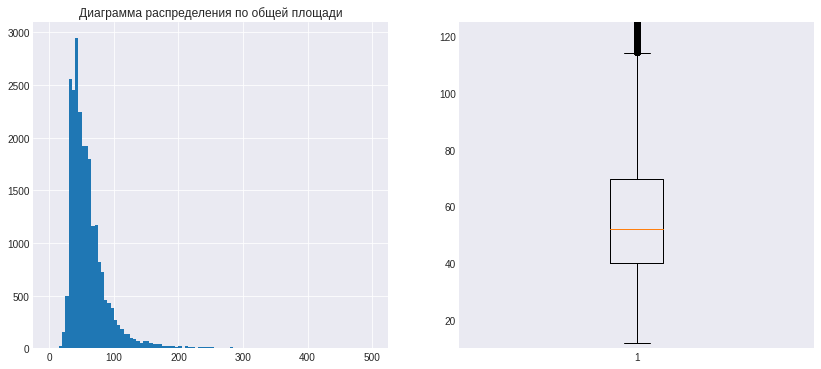

In [ ]:
# общая площадь
total_area = data[['total_area']]
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(14, 6))

ax1.hist(data['total_area'], bins=100, range=(0, 500))
# total_area.boxplot()
#plt.ylim(10, 125)
# ax1.ylim(10, 125)
ax1.grid(True)
ax1.set_title('Диаграмма распределения по общей площади')
#ax1.set_xlabel('Общая площадь')
#ax1.set_ylabel('Количество')

ax2.boxplot(total_area)
plt.ylim(10, 125)
plt.show()


Больше всего продавали квартиры площадью от 40 до 50 кв.м. Снизу выбросов нет, сверху - выбросы можно считать от 115 м, но с этой отметки могут начинаться элитные квартиры как в исторических домах, так и недавно построенных элитных комплексах, которые представлены на рынке не так, как типовое жилье, однако оказывают существенное влияние на общую оценку рынка недвижимости рассматриваемого города и области.

Корреляция общей площади и кв.м.: 0.3
Корреляция общей площади и конечной цены 0.65


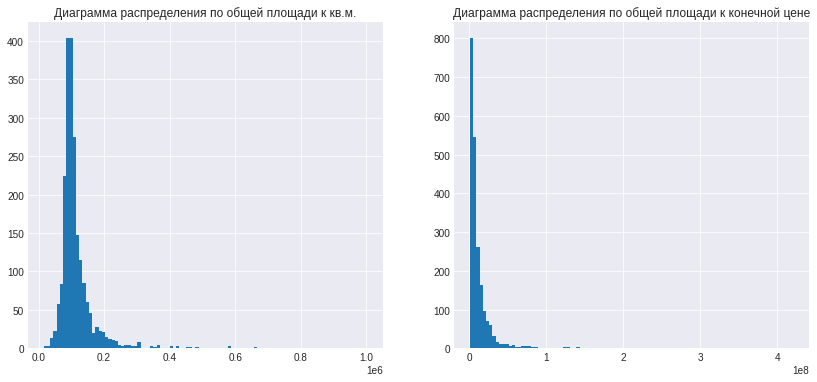

In [ ]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(14, 6))

ax1.hist(data.pivot_table(index='total_area', values='sm_price'), bins=100)
ax1.grid(True)
ax1.set_title('Диаграмма распределения по общей площади к кв.м.')

ax2.hist(data.pivot_table(index='total_area', values='last_price'), bins=100)
ax2.grid(True)
ax2.set_title('Диаграмма распределения по общей площади к конечной цене')

corr_total_area=data['sm_price'].corr(data['total_area']).round(2)
corr_total_area1=data['last_price'].corr(data['total_area']).round(2)
print ('Корреляция общей площади и кв.м.:', corr_total_area)
print ('Корреляция общей площади и конечной цены', corr_total_area1)

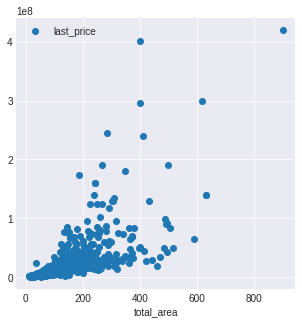

In [ ]:
data.pivot_table(index='total_area', values='last_price').plot(grid=True, style='o', figsize=(5, 5))
plt.show()

Коэффициент корреляции общей площади и стоимости квадратного метра (0,3) показывает, что связь есть, но не линейная. Корреляция общей площади и конечной цены является значимым - 0.65, что позволяет сделать вывод, что скорее на рост стоимости объекта при увеличении площади влияют и другие показатели. Например, дорогие объекты с большим метражом скорее находятся в элитных объеках, а не в типовых МКД, возможо с улучшенными качеством постройки и инфраструктурой.

Корреляция жилой площади и кв.м.: 0.23
Корреляция жилой площади и конечной цены 0.58


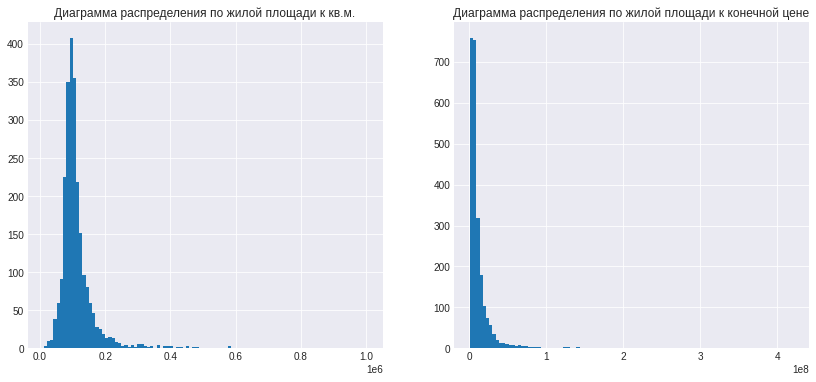

In [ ]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(14, 6))

ax1.hist(data.pivot_table(index='living_area', values='sm_price'), bins=100)
ax1.kind = 'scatter'
ax1.grid(True)
ax1.set_title('Диаграмма распределения по жилой площади к кв.м.')

ax2.hist(data.pivot_table(index='living_area', values='last_price'), bins=100)
ax2.grid(True)
ax2.set_title('Диаграмма распределения по жилой площади к конечной цене')

corr_living_area=data['sm_price'].corr(data['living_area']).round(2)
corr_living_area1=data['last_price'].corr(data['living_area']).round(2)
print ('Корреляция жилой площади и кв.м.:', corr_living_area)
print ('Корреляция жилой площади и конечной цены', corr_living_area1)

Коэффициент корреляции жилой площади к  стоимости квадратного метра (0,23) и конечной цене (0.58) практически повторяет аналогичный показатель общей площади и свидетельствует в целом о том же: чем больше жилая площадь - тем дороже объект, а на цену квадратного метра влияние оказывает еще и качество объекта.

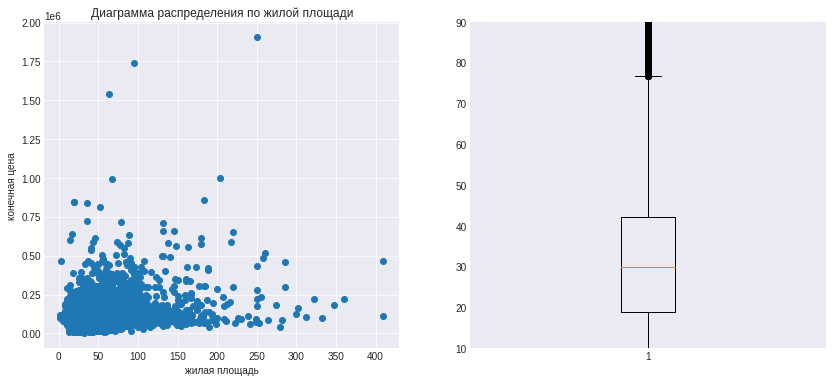

In [ ]:
living_area = data[['living_area']]
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(14, 6))

ax1.scatter(x=data['living_area'], y=data['sm_price'] ) #bins=10, range=(0, 400))
#ax1.
ax1.grid(True)
ax1.set_title('Диаграмма распределения по жилой площади')
ax1.set_xlabel('жилая площадь')
ax1.set_ylabel('конечная цена')

ax2.boxplot(living_area)
plt.ylim(10, 90)
plt.show()

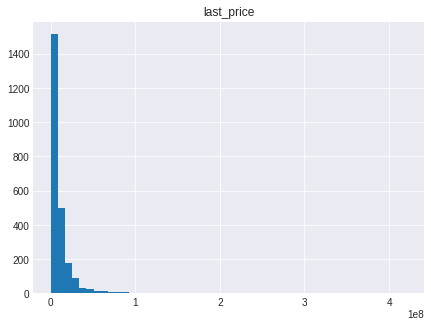

In [ ]:
#data.pivot_table(index='living_area', values='last_price').plot(grid=True, style='o', figsize=(5, 5))
plt.show()
data.pivot_table(index='living_area', values='last_price').hist(grid=True, bins=50, figsize=(7, 5))
plt.show()

Корреляция площади кухни и кв.м.: 0.3
Корреляция площади кухни и конечной цены 0.65


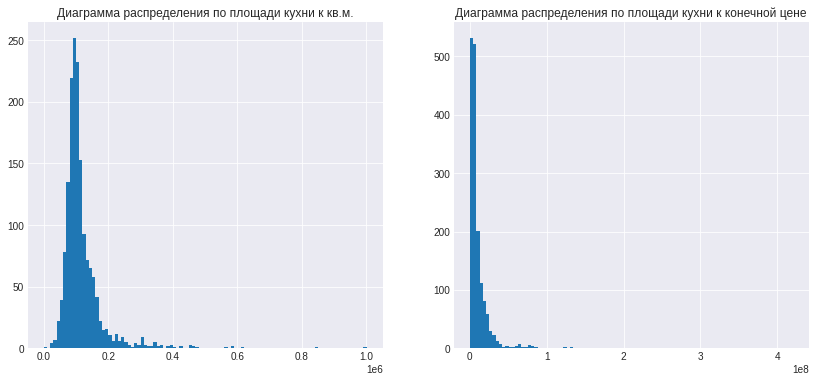

In [ ]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(14, 6))

ax1.hist(data.pivot_table(index='kitchen_area', values='sm_price'), bins=100)
ax1.grid(True)
ax1.set_title('Диаграмма распределения по площади кухни к кв.м.')

ax2.hist(data.pivot_table(index='kitchen_area', values='last_price'), bins=100)
ax2.grid(True)
ax2.set_title('Диаграмма распределения по площади кухни к конечной цене')

corr_kitchen_area=data['sm_price'].corr(data['kitchen_area']).round(2)
corr_kitchen_area1=data['last_price'].corr(data['kitchen_area']).round(2)
print ('Корреляция площади кухни и кв.м.:', corr_total_area)
print ('Корреляция площади кухни и конечной цены', corr_total_area1)

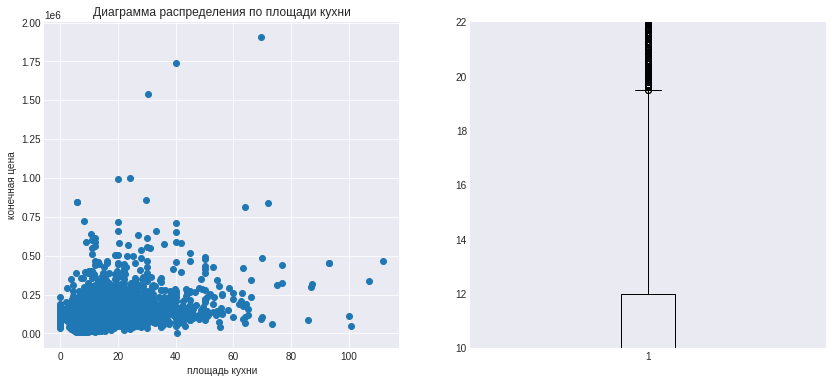

In [ ]:
kitchen_area = data[['kitchen_area']]
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(14, 6))

ax1.scatter(x=data['kitchen_area'], y=data['sm_price'] )
ax1.grid(True)
ax1.set_title('Диаграмма распределения по площади кухни')
ax1.set_xlabel('площадь кухни')
ax1.set_ylabel('конечная цена')

ax2.boxplot(kitchen_area)
plt.ylim(10, 22)
plt.show()

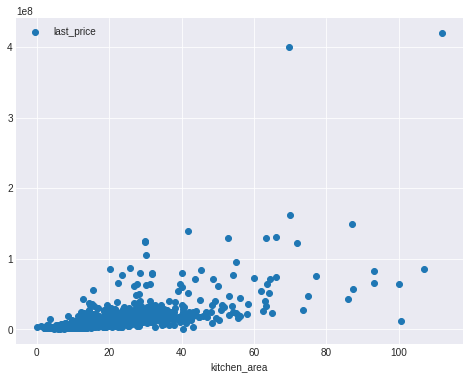

In [ ]:
data.pivot_table(index='kitchen_area', values='last_price').plot(grid=True, style='o', figsize=(8, 6))
plt.show()

Корреляция площади кухни и кв.м.: 0.3, корреляция площади кухни и конечной цены 0.65, выводы в целом повторяются. На диаграмму размаха достаточно сильно влияет показатель студий, в которых площадь кухни считается как 0 (т.к. отдельно не выделена), поэтому медианное значение сильно смещено и выбросов снизу вообще нет, большая часть квартир имеют площадь кухни от 0 (студии) до 12 метров, с 19 м. уже начинаются выбросы.

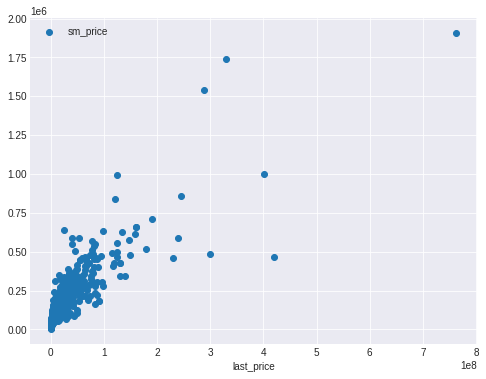

Корреляция цены объекта и квадратного метра: 0.73


In [ ]:
data.pivot_table(index='last_price', values='sm_price').plot(grid=True, style='o', figsize=(8, 6))
plt.show()
corr_cent=data['last_price'].corr(data['sm_price']).round(2)
print('Корреляция цены объекта и квадратного метра:', corr_cent)

Взаимосвязь между ценой квадратного метра и конечной ценой объекта велика, но очевидно, что на цену оказывает влияние еще множество факторов

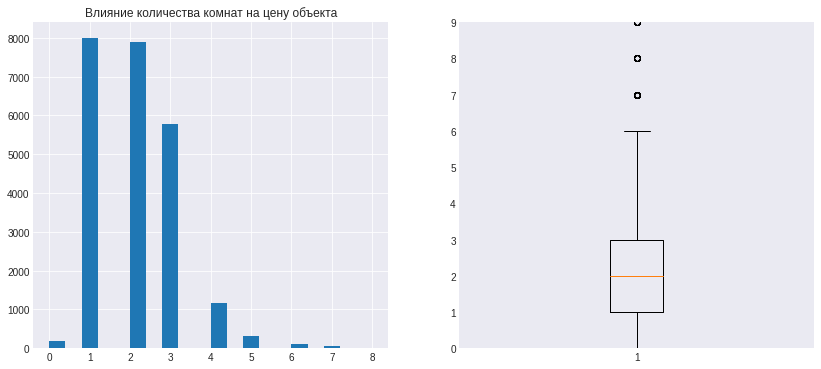

Корреляция цены и количества комнат: 0.05


In [ ]:
rooms_n = data[['rooms']]
#data.pivot_table(index='rooms', values='sm_price').plot(grid=True, style='o', figsize=(5, 5))
#plt.show()
corr_rooms=data['rooms'].corr(data['sm_price']).round(2)

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(14, 6))
ax1.hist(data['rooms'], bins=20, range=(0, 8))
ax1.grid(True)
ax1.set_title('Влияние количества комнат на цену объекта')
#ax1.set_xlabel('Общая площадь')
#ax1.set_ylabel('Количество')

ax2.boxplot(rooms_n)
plt.ylim(0, 9)
plt.show()

print ('Корреляция цены и количества комнат:', corr_rooms)

Очевидно, количество комнат не оказывает влияние на конечную цену объекта, а диаграмма размаха показывает, что больше всего продавали 1-3 комнатные квартиры, а 2-комнатные бесспорный лидер продаж, объекты больше 6 комнат встречаются редко.

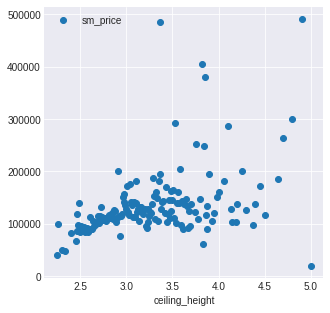

Корреляция цены и высоты потолков: 0.29


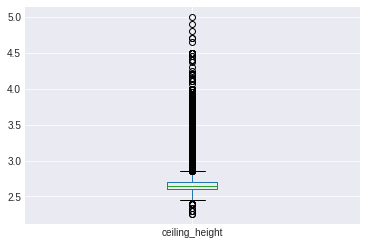

In [ ]:
data.pivot_table(index='ceiling_height', values='sm_price').plot(grid=True, style='o', figsize=(5, 5))
plt.show()
corr_ceiling=data['sm_price'].corr(data['ceiling_height']).round(2)
ceiling=data[['ceiling_height']]
ceiling.boxplot ()
print ('Корреляция цены и высоты потолков:', corr_ceiling)

Высота потолков не оказывает решающего влияния на стоимость квадратного метра. В среднем продавались квартиры с высотой потолков от 2,4 до 2,8 м), есть выбросы в меньшую и большую стороны, встречаются квартиры с высотой потолков до 5 метров, как единичные случаи.  

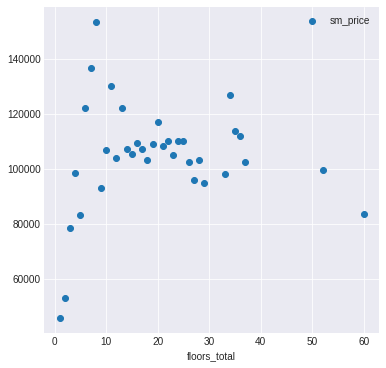

Корреляция цены и этажности:  0.15


In [ ]:
data.pivot_table(index='floors_total', values='sm_price').plot(grid=True, style='o', figsize=(6, 6))
plt.show()
corr_floortot=data['sm_price'].corr(data['floors_total']).round(2)
print('Корреляция цены и этажности: ', corr_floortot)

Этажность также не оказывает решающего влияния на цену квадратного метра

           last_price
center_km            
0.0        17900000.0
1.0        11490000.0
2.0        10000000.0
3.0         8409000.0
4.0         9200000.0
...               ...
61.0        3200000.0
62.0        3200000.0
63.0        3600000.0
65.0        3475000.0
66.0        4000000.0

[61 rows x 1 columns]


<AxesSubplot:xlabel='center_km'>

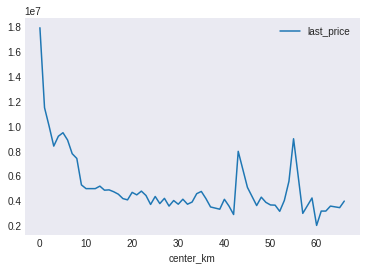

In [ ]:
pivot_table_center=data.pivot_table(
    index='center_km',
    values='last_price',
    aggfunc='median')
print (pivot_table_center)
pivot_table_center.plot()

,mean,count,median
floor_type,,,
другой,103482.116251,17323,98285.542169
первый,82001.066757,2908,81236.814346
последний,93032.283028,3323,87719.298246


0.12977556616660085

,mean,count,median
floor,,,
1,82001.066757,2908,81236.814346
27,92476.743449,10,87916.214207
5,96013.464082,2609,90697.674419
2,94441.261513,3348,90754.985755
26,95806.505813,24,91176.921460


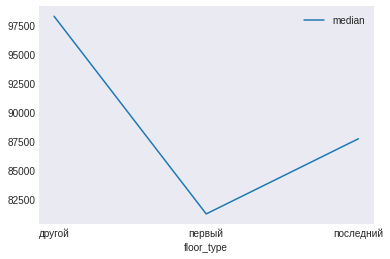

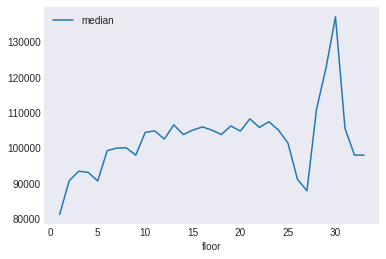

In [ ]:
pivot_table_floor_type = data.pivot_table(
    index = 'floor_type', values = 'sm_price', aggfunc = ['mean', 'count', 'median'])
pivot_table_floor_type.columns = ['mean', 'count', 'median']
pivot_table_floor_type.plot(y = 'median')
pivot_table_floor = data.pivot_table(
    index = 'floor', values = 'sm_price', aggfunc = ['mean', 'count', 'median'])
pivot_table_floor.columns = ['mean', 'count', 'median']
pivot_table_floor.plot(y = 'median')

display(pivot_table_floor_type)
display(data['floor'].corr(data['sm_price']))
pivot_table_floor.sort_values(by='median').head()

Средняя цена первого и последнего этажей традиционно снижает среднюю цену квадратного метра

Корреляция удаленности от центра и кв.м.: -0.32
Корреляция удаленности от центра и конечной цены -0.21


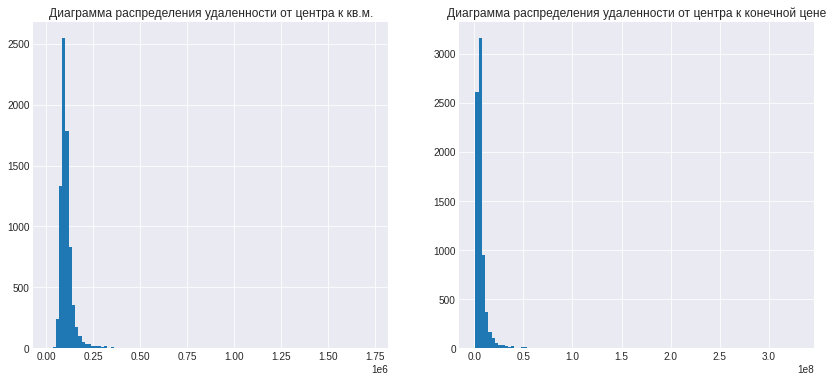

In [ ]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(14, 6))

ax1.hist(data.pivot_table(index='cityCenters_nearest', values='sm_price'), bins=100)
ax1.grid(True)
ax1.set_title('Диаграмма распределения удаленности от центра к кв.м.')

ax2.hist(data.pivot_table(index='cityCenters_nearest', values='last_price'), bins=100)
ax2.grid(True)
ax2.set_title('Диаграмма распределения удаленности от центра к конечной цене')

corr_centers=data['sm_price'].corr(data['cityCenters_nearest']).round(2)
corr_centers1=data['last_price'].corr(data['cityCenters_nearest']).round(2)
print ('Корреляция удаленности от центра и кв.м.:', corr_centers)
print ('Корреляция удаленности от центра и конечной цены', corr_centers1)

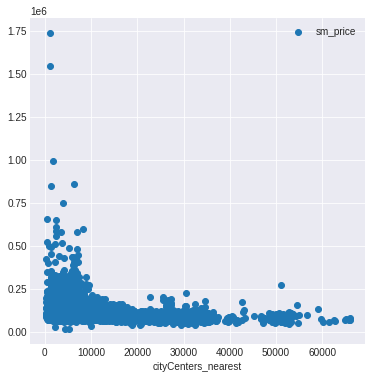

Корреляция цены и удаленности от центра: -0.32


In [ ]:
data.pivot_table(index='cityCenters_nearest', values='sm_price').plot(grid=True, style='o', figsize=(6, 6))
plt.show()
corr_cent=data['sm_price'].corr(data['cityCenters_nearest']).round(2)
print('Корреляция цены и удаленности от центра:', corr_cent)

Коэффициент корреляции Пирсона равен -0,32, что говорит о слабой взаимосвязи между ценой за кв.м. и удаленностью от центра (отрицательный коэффициент и к конечной цене). Помимо удаленности на цену могут влиять: состояние объекта, т.е. вероятно, какие-то дорогостоящие объекты расположенны в экологичных/красивых/модных локациях (типа Курортный район, Лисий нос, Ольгино?), при этом коэффициент корреляции квадратного метра больше зависит от удаленности от центра, чем коэффициент корреляции общей площади.   

Корреляция удаленности от парков и кв.м.: 0.01
Корреляция удаленности от парков и конечной цены -0.02


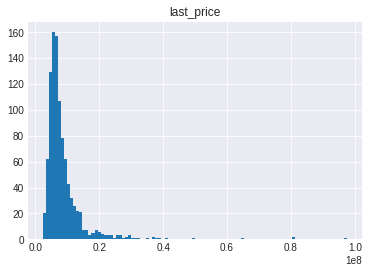

In [ ]:
data.pivot_table(index='parks_nearest',values='last_price').hist(bins=100) #(bins=100,grid(True)

corr_parks=data['sm_price'].corr(data['parks_nearest']).round(2)
corr_parks1=data['last_price'].corr(data['parks_nearest']).round(2)
print ('Корреляция удаленности от парков и кв.м.:', corr_parks)
print ('Корреляция удаленности от парков и конечной цены', corr_parks1)

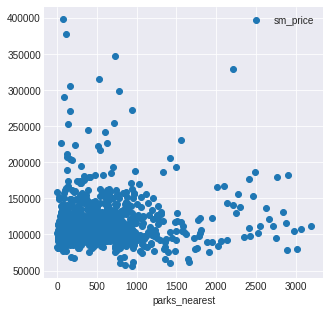

Корреляция цены кв.м. и расстояния до ближайшего парка: 0.01


In [ ]:
data.pivot_table(index='parks_nearest', values='sm_price').plot(grid=True, style='o', figsize=(5, 5))
plt.show()
corr_park=data['sm_price'].corr(data['parks_nearest']).round(2)

print ('Корреляция цены кв.м. и расстояния до ближайшего парка:', corr_park)

Нахождение парка поблизости не влияет на цену квадратного метра объекта, то же самое и по прудам.

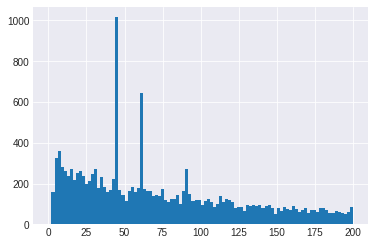

Среднее время продажи квартиры: 181 дн.
Медианное время продажи квартиры: 95 дн.


count    20385.000000
mean       180.688398
std        219.703492
min          1.000000
25%         45.000000
50%         95.000000
75%        231.000000
max       1580.000000
Name: days_exposition, dtype: float64

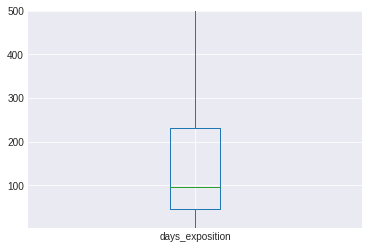

In [ ]:
#создаем переменную, куда включаем непустые данные о дате экспозиции квартиры
sale_period=data[~data['days_exposition'].isna()]
# строим гистограмму
sale_period['days_exposition'].hist(bins=100, range=(0,200))
plt.show()
# рассчитываем среднее, медианное время и строим диаграмму размаха
print('Среднее время продажи квартиры: {:.0f} дн.'.format(sale_period['days_exposition'].mean()))
print('Медианное время продажи квартиры: {:.0f} дн.'.format(sale_period['days_exposition'].median()))
sale_period[['days_exposition']].boxplot()
plt.ylim(1, 500)
data['days_exposition'].describe()

Время продажи в рамках диаграммы размаха составлет от 45 до 231 дня, следовательно продажи до этого срока можно назвать быстрыми, а больше - медленными

                      mean          median
           days_exposition days_exposition
total_area                                
12.0            200.000000           200.0
13.0            147.666667            24.0
13.2             19.000000            19.0
14.0              4.000000             4.0
15.0             43.500000            43.5
...                    ...             ...
500.0           176.500000           176.5
507.0          1078.000000          1078.0
590.0            14.000000            14.0
618.0           111.000000           111.0
900.0           106.000000           106.0

[1997 rows x 2 columns]


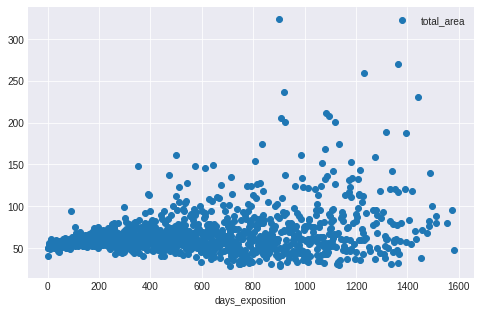

In [ ]:
days_to_total_area = data.pivot_table(
    index = 'total_area',
    values = 'days_exposition',
    aggfunc = ['mean','median'])
print (days_to_total_area)
data.pivot_table(index='days_exposition', values='total_area').plot(grid=True, style='o', figsize=(8, 5))
plt.show()

Диаграмма рассеивания показывает, что чем больше площадь квартиры - тем больше смещается срок ее продажи в сторону увеличения.

In [ ]:
print (data['locality_name'].value_counts().head(10))

Санкт-Петербург    15643
Мурино               586
Кудрово              470
Шушары               439
Всеволожск           398
Пушкин               369
Колпино              338
Парголово            327
Гатчина              307
Выборг               237
Name: locality_name, dtype: int64


                 sm_price
locality_name            
Всеволожск          68654
Выборг              58141
Гатчина             68746
Колпино             75424
Кудрово             95260
Мурино              86041
Парголово           90175
Пушкин             103125
Санкт-Петербург    114795
Шушары              78551
Минимальная цена квадратного метра составляет: 111.83 рублей
Максимальная цена квадратного метра составляет: 1907500.0 рублей
Средняя цена квадратного метра составляет: 99355.78 рублей


count      23554.00
mean       99355.78
std        50189.70
min          111.83
25%        76563.41
50%        95000.00
75%       114206.13
max      1907500.00
Name: sm_price, dtype: float64

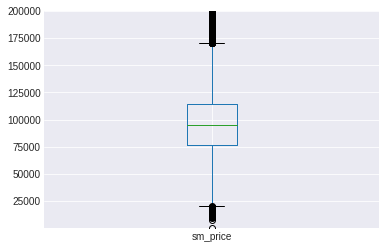

In [ ]:
# Посчитайте среднюю цену одного квадратного метра в 10 населённых пунктах с наибольшим
# числом объявлений — постройте сводную таблицу с количеством объявлений и средней ценой
# квадратного метра для этих населенных пунктов.
topten = data['locality_name'].value_counts().head(10)
locality_sm_price = data.query('locality_name in (@topten.index)').pivot_table(values='sm_price', index='locality_name')
locality_sm_price = locality_sm_price.astype(int)
locality_sm_price.sort_values('sm_price', ascending=False)
print (locality_sm_price)
# Выделите населённые пункты с самой высокой и низкой стоимостью квадратного метра.
min_sm_price = data['sm_price'].min().round(2)
max_sm_price = data['sm_price'].max().round(2)
median_sm_price = data['sm_price'].mean().round(2)
sm_price = data[['sm_price']]
sm_price.boxplot()
plt.ylim(1, 200000)
print (f'Минимальная цена квадратного метра составляет: {min_sm_price} рублей')
print (f'Максимальная цена квадратного метра составляет: {max_sm_price} рублей')
print (f'Средняя цена квадратного метра составляет: {median_sm_price} рублей')
data['sm_price'].describe().round(2)


In [ ]:
pivot_table_min_max = data.pivot_table(
    index = 'locality_name',
    values = 'sm_price',
    aggfunc = ['mean','median'])
pivot_table_min_max.columns = ['mean','median']
display('самые дешевые объекты находятся в',
        pivot_table_min_max[pivot_table_min_max['mean'] == pivot_table_min_max['mean'].min()])
display('самые дорогие объекты находятся в',
        pivot_table_min_max[pivot_table_min_max['mean'] == pivot_table_min_max['mean'].max()])

'самые дешевые объекты находятся в'

,mean,median
locality_name,,
Старополье,11206.221198,11000.0


'самые дорогие объекты находятся в'

,mean,median
locality_name,,
Зеленогорск,115122.799198,101666.666667


    В ходе анализа было установлено, что больше всего предложений было по следующим населенным пунктам:

Санкт-Петербург      15651

посёлок Мурино         520

посёлок Шушары         439

Всеволожск             398

Пушкин                 369

Колпино                338

посёлок Парголово      327

Гатчина                307

деревня Кудрово        299

Выборг                 237

<div class="alert alert-info"> <b>Комментарий студента:</b>
Исследуемые данные говорят нам о том, что минимальная цена квадратного метра составляет: 111.83 рублей, максимальная цена квадратного метра составляет: 1 907 500 рублей., а средняя цена квадратного метра составляет: 99 356 рублей, отбросив "шумы" будем ориентироваться на цену от 76 563 руб. (первый квантиль) до 114206 руб. (третий квантиль).
    
    Самые дешевые объекты - в Старополье (средняя цена 11000 руб. за кв.м.), самые дорогие - в Зеленодольске (средняя цена - 101666 руб. за кв.м.) - рассчет ниже

Первый и последний этажи традиционно дешевле остальных на 11-17%

другой 98285.5

первый 81236.8

последний 87719.3

<AxesSubplot:title={'center':'График цены в зависимости от удаленности от центра'}, xlabel='км от центра'>

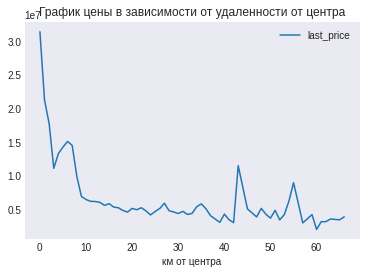

In [ ]:
center_table=data.pivot_table(index='center_km', values='last_price', aggfunc='mean').round(0)
center_table
center_table.plot(title='График цены в зависимости от удаленности от центра', xlabel='км от центра')

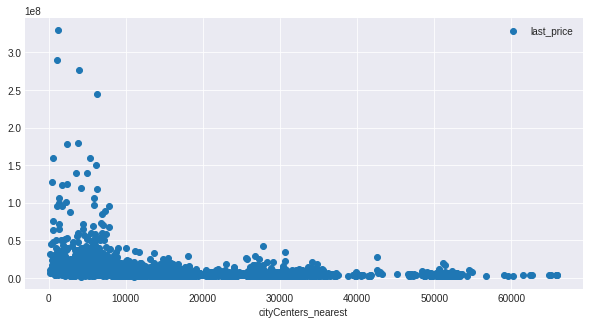

In [ ]:
(
    data.pivot_table(index='cityCenters_nearest', values='last_price')
    .plot(grid=True, style='o', figsize=(10, 5))
)
plt.show()

### Общий вывод

В предоставленном датасете представлено 23699 записей, есть пропущенные значения, в том числе в важных для анализа столбцах (жилая площадь и название населенного пункта), а также аномальные значения и неправильные типы данных. Явных дубликатов в данных не обнаружено.

В 297 локациях не указано расстояние до центра, в основном это деревни и поселки, но для целей анализа можно предложить разработчикам поправить это. Также разброс цен при равном расстоянии может указывать на "элитность" или "маргинальность" тех или иных локаций.

В ходе анализа было установлено, что больше всего предложений было по следующим населенным пунктам:

Санкт-Петербург      15651

посёлок Мурино         520

посёлок Шушары         439

Всеволожск             398

Пушкин                 369

Колпино                338

посёлок Парголово      327

Гатчина                307

деревня Кудрово        299

Выборг                 237

Средняя стимость квадратного метра в 10 локациях с наибольшим предложением - 83576 руб. Самые дешевые объекты - в Старополье (средняя цена 11000 руб. за кв.м.), самые дорогие - в Зеленодольске (средняя цена - 101666 руб. за кв.м.)
Время продажи в рамках диаграммы размаха составлет от 45 до 231 дня, следовательно продажи до этого срока можно назвать быстрыми, а больше - медленными.  Диаграмма рассеивания указывает на закономерность: чем больше площадь квартиры - тем больше смещается срок ее продажи в сторону увеличения.

Корреляция цены и удаленности от центра: -0.32 говорит о слабой взаимосвязи между ценой за кв.м. и удаленностью от центра (отрицательный коэффициент и к конечной цене). Помимо удаленности на цену могут влиять: состояние объекта, т.е. вероятно, какие-то дорогостоящие объекты расположенны в экологичных/красивых/модных локациях (типа Курортный район, Лисий нос, Ольгино?), при этом коэффициент корреляции квадратного метра больше зависит от удаленности от центра, чем коэффициент корреляции общей площади.

Корреляция цены и расстояния до ближайшего парка: 0.01, т.е. Нахождение парка поблизости не влияет на цену квадратного метра объекта, так же как и пруда.

Корреляция цены и количества комнат: 0.05, наиболее востребованы 1-3 комнатные квартиры, а 2-комнатные бесспорный лидер продаж. Судя по диаграмме размаха, объекты больше 6 комнат встречаются редко и могут относится к выбросам.

Корреляция цены и этажности:  0.15 - этажность также не оказывает решающего влияния на цену квадратного метра

Корреляция цены и жилой площади: 0.23

Корреляция цены и высоты потолков: 0.29 - влияние не существенное. Высота потолков не оказывает решающего влияния на стоимость квадратного метра. В среднем продавались квартиры с высотой потолков от 2,4 до 2,8 м, есть выбросы в меньшую и большую стороны, встречаются квартиры с высотой потолков до 5 метров, как единичные случаи.

Корреляция цены и общей площади: 0.3. Больше всего выставлялось квартир площадью от 40 до 50 кв.м. Также выбросами можно считать квартиры площадью от 115 м, но с этой отметки могут начинаться элитные квартиры как в исторических домах, так и недавно построенных элитных комплексах, которые представлены на рынке не так широко, как типовое жилье, однако оказывают существенное влияние на общую оценку рынка недвижимости рассматриваемого города и области.

Корреляция площади кухни и кв.м.: 0.3, корреляция площади кухни и конечной цены 0.65, выводы в целом повторяются. На диаграмму размаха достаточно сильно влияет показатель студий, в которых площадь кухни считается как 0 (т.к. отдельно не выделена), поэтому медианное значение сильно смещено и выбросов снизу вообще нет, большая часть квартир имеют площадь кухни от 0 (студии) до 12 метров, с 19 м. уже начинаются выбросы.

Корреляция цены объекта и квадратного метра: 0.73. Очевидно, что чем больше по метражу - тем выше цена, но на цену квадратного метра также оказывает влияние еще ряд факторов.

Наименьшее влияние (даже обратная зависимость) наблюдается в отношении расстояния от центра, это характерная для питера черта, так как близость к другим объектам типа Финского залива также играла на повышение цены. Наибольшее влияние на цену квадратного метра оказывает общая цена объекта, что очевидно говорит о том, что квадратный метр дорогого элитного жилья стоит больше обычного.

Исследуемые данные говорят нам о том, что минимальная цена квадратного метра составляет: 111.83 рублей, максимальная цена квадратного метра составляет: 1 907 500 рублей., а средняя цена квадратного метра составляет: 99 356 рублей, отбросив "шумы" будем ориентироваться на цену от 76 563 руб. (первый квантиль) до 114206 руб. (третий квантиль).

Первый и последний этажи традиционно дешевле остальных на 11-17%   

другой      98285.542169

первый      81236.814346

последний   87719.298246

Рекомендуется при покупке жилья ориентироваться на средние показатели и коэффициенты, полученые в результате анализа данного датасета.